In [11]:
%reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
AbortGap_B1 = pd.read_pickle('../Data/Beam1_AbortGap.pkl')
AbortGap_B1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 2 columns):
Time Stamp    1899 non-null float64
Reading       1899 non-null float64
dtypes: float64(2)
memory usage: 29.8 KB


In [13]:
BLM_B1 = pd.read_pickle('../Data/Beam1_BLM.pkl')
BLM_B1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
Time Stamp    1898 non-null float64
Reading 1     1898 non-null float64
Reading 2     1898 non-null float64
Reading 3     1898 non-null float64
dtypes: float64(4)
memory usage: 59.4 KB


In [14]:
Intensities_B1 = pd.read_pickle('../Data/Beam1_SPSandLHC.pkl')
Intensities_B1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 4 columns):
Time Stamp          1022 non-null float64
Time Differences    1022 non-null float64
SPS Reading         1022 non-null float64
LHC Reading         1022 non-null float64
dtypes: float64(4)
memory usage: 32.0 KB


In [35]:
def sync_up(df1, df2, time_col):
    #the longer df must be df1
    for i in range(0,len(df1)):
        try:
            while abs(df1[time_col][i]-df2[time_col][i])>10:
                #drop the row and reindex
                df1 = df1.drop(i)
                df1.index = range(len(df1))
        except KeyError:
            df1 = df1[0:i]
            break
    return df1

In [23]:
AbortGap_B1['Time Stamp'][1897]-BLM_B1['Time Stamp'][1897]

-3.674999952316284

Text(0,0.5,'BLM')

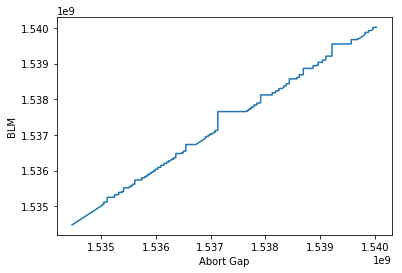

In [25]:
plt.figure()
plt.plot(AbortGap_B1['Time Stamp'][0:1898], BLM_B1['Time Stamp'])
plt.xlabel('Abort Gap')
plt.ylabel('BLM')

In [26]:
AbortGap_B1 = AbortGap_B1[0:1898]

Text(0.5,1,'Showing Independence of Abort Gap to BLM Reading 1')

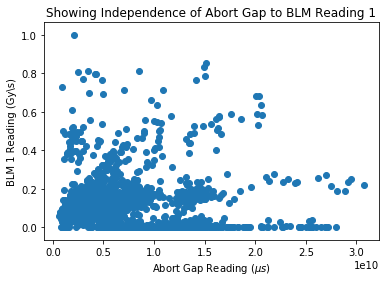

In [29]:
plt.figure()
plt.scatter(AbortGap_B1['Reading'],BLM_B1['Reading 1'])
plt.xlabel('Abort Gap Reading (' + r'$\mu s$)')
plt.ylabel('BLM 1 Reading (Gy\s)')
plt.title('Showing Independence of Abort Gap to BLM Reading 1')

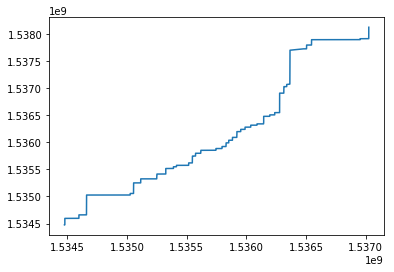

In [43]:
#Ask About how to deal with this
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

#plt.figure()
#plt.plot(AbortGap_B1['Time Stamp'][0:1022], Intensities_B1['Time Stamp'])
#plt.xlabel('Abort Gap')
#plt.ylabel('Intensities')

fig, ax = plt.subplots()
ax.plot(AbortGap_B1['Time Stamp'][0:1022], Intensities_B1['Time Stamp'])
line = mlines.Line2D([15345e9,15345e9], [15370e9,15370e9], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()


In [36]:
df = sync_up(AbortGap_B1,Intensities_B1,'Time Stamp')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
Time Stamp    106 non-null float64
Reading       106 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [34]:
AbortGap_B1['Time Stamp'][9:20]-Intensities_B1['Time Stamp'][9:20]

9    -3.390
10   -5.390
11   -5.389
12    0.613
13    1.614
14   -1.383
15   -2.383
16    0.618
17   -5.382
18   -3.380
19   -5.380
Name: Time Stamp, dtype: float64